# Clustering

<br>

### Task description

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

<br>

#### UCI Mushroom Dataset

The UCI Mushroom Dataset is a collection of data used to classify mushrooms as either edible or poisonous. It consists of 8,124 samples, each described by 22 categorical features like cap shape, color, odor, and gill size. The goal is to use these characteristics to predict whether a mushroom is safe to eat.

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [3]:
# Load the UCI mushroom dataset.
mushroom_data = pd.read_csv('data/agaricus-lepiota.data') # Read the data from the csv file into a dataframe.
mushroom_data.pop("edibility") # Remove target value as the unsupervised learning model should not know it.
mushroom_data.head() # Show the first five rows in the dataset to verify.

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


##### Silhouette score

The silhouette score indicates how good a cluster is. It measures how similar a data point is to its own cluster compared to other clusters. A higher silhouette score means better clusters.


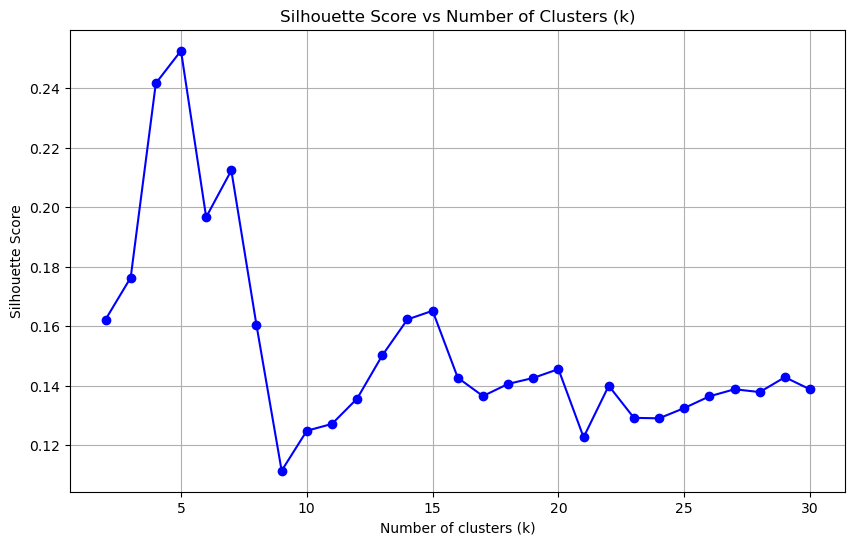

In [26]:
# The k-means algorithm only works with numerical data.
dummies = pd.get_dummies(mushroom_data) # Convert the categorical data to numerical values.  

k_values = range(2, 31) # The range for number of clusters to test.
silhouette_scores = [] # The silhouette scores for each value of k.

# Iterate over different k values and calculate silhouette score for each k.
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42) # Create an instance of the KMeans clustering model.
    cluster_labels = kmeans.fit_predict(dummies) # Train and assign each data point to a cluster.
    score = silhouette_score(dummies, cluster_labels) # Calculate the score for the current clustering.
    silhouette_scores.append(score)

# Plot the silhouette scores.
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', color='b')
plt.title('Silhouette Score vs Number of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Optimal number of clusters based on silhouette score: 5


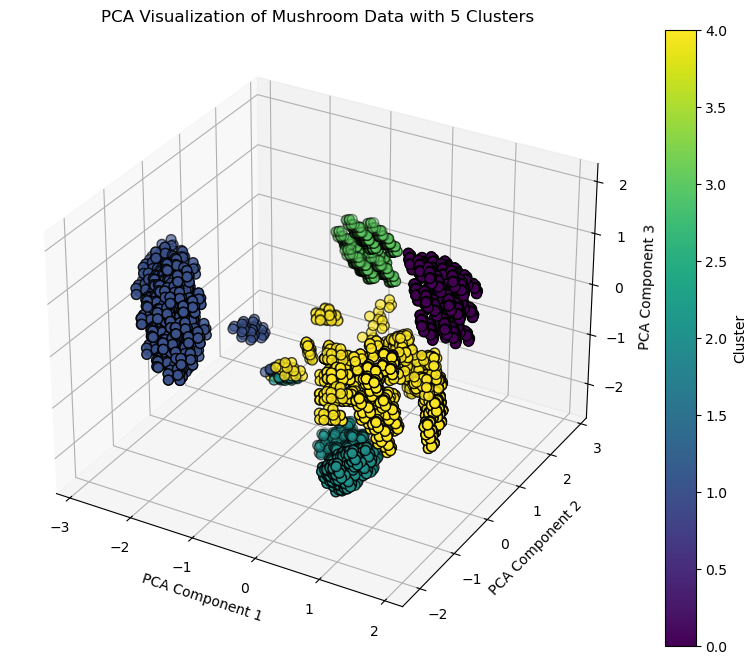

In [27]:
# Find the optimal number of clusters (k) based on the highest silhouette score.
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

# Apply k-means clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_optimal.fit_predict(dummies)

# Reduce the data to 3 dimensions with PCA to visualize the clustering.
pca = PCA(n_components=3)  
mushroom_data_pca = pca.fit_transform(dummies) 

# Plot the clusters.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(mushroom_data_pca[:, 0], mushroom_data_pca[:, 1], mushroom_data_pca[:, 2],
                     c=clusters, cmap='viridis', s=50, edgecolor='k')

ax.set_title(f'PCA Visualization of Mushroom Data with {optimal_k} Clusters')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

colorbar = fig.colorbar(scatter)
colorbar.set_label('Cluster')

plt.show()
